## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **4th November 2022 at 11:59 pm**. 

6. Some questions in this assignment do not have a single correct answer. As data visualization is subject to interpretation, any logically sound answer / explanation is acceptable.

7. There is a bonus question worth 30 points. However, there is no partial credit for the bonus question. You will get 30 or 0. If everything is correct, you can score 130 out of 100 in the assignment.

# Exploring factors associated with profitability of a movie {-}
In this assignment we'll attempt to find the factors (or variables) that make a movie profitable.

Read the movies data from [here](https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json), in a Pandas DataFrame named as `movies_data`. The profit of movie is defined as:

$$profit = Worldwide \ Gross - Production \ Budget$$

## Time trend
Let us analyze if the profitability of a movie is associated with the time of its release.

### Month of release
#### 
Make an appropriate plot to visualize the mean profit of movies released each month.

**Hint:** 

1. Use the Pandas function [to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert *Release Date* to a `datetime` datatype.

2. Use the library [`datetime`](https://docs.python.org/3/library/datetime.html) to extract the month from *Release Date*.

*(6 points)*

####  

Based on the plot, which seasons have been the most and least profitable (on an average) for a movie release. Don't worry about the exact start and end date of seasons. Don't perform any computations. Just make comments based on the plot. You can use seasons such as *early summer, late spring* etc. 

*(2 points)*

### Month of release with number of movies in each genre

####  
Now that we know the most profitable season for releasing movies, let us visualize if some `genre`s are more popular during certain seasons.

Use the code below to create a new column called `genre`.

In [4]:
#Combining Major Genre
movies_data['genre'] = movies_data['Major Genre'].apply(lambda x:'Comedy' if x!=None and 'Comedy' in x else 'Horror' if x!=None and 'Thriller' in x else 'Action/Adventure' if x!=None and ('Action' in x or 'Adventure' in x) else 'Musical/Western' if x!=None and ('Musical' in x or 'Western' in x or 'Concert' in x) else x)

Make an appropriate plot to visualize the number of movies released for each `genre` in each calendar month.

*(8 points)*

**Hint:** 

1. Use [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html) with *estimator* as `len`

2. Use the *hue* argument

####  
Based on the above plot, which `genre` is the most popular during the most profitable season of release? And which genre is the most popular during the least profitable season of release?

*(2 points)*

### Month of release with proportion of movies in each genre
#### 
Visualize the proportion of movies in each `genre` for each month of release.

Use the code below to re-arrange your data that will help with creating the visualization

In [5]:
genre_proportion_release_month = pd.crosstab(index=movies_data['release_month'],
                             columns=movies_data['genre'],
                             normalize="index")
genre_proportion_release_month.head()

**Hint:** 

1. Make a 100% stacked barplot with the Pandas [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function

2. Use the argument `bbox_to_anchor` with the Matplotlib function [legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) to place the legend outside the plot area.

*(8 points)*

### 
Which `genre` is the most popular during the month of May, and which one is the most popular during December?

*(2 points)*

### Year of release with genre
#### 
Make an appropriate figure to visualize the average profit of movies of each `genre` for each year. Consider only the movies released from 1991 to 2010. Also show the 95% confidence interval in the average profit.

**Hint:**

1. Use the library `datetime` to extract year from `Release Date`.

2. Use the Seaborn [Facetgrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object.

3. A figure can have multiple subplots. Put the figure for each genre in a separate subplot.

*(6 points)*

### 
Based on the figure above, which `genre`'s profitabiltiy seems to be increasing over the years, and which `genre` has the least uncertainty in profit for most of the years.


*(2 points)*

## Associations

### Pairplot / heatmap

#### 
Make a pairplot and heatmap of all the continuous variables in the data.

*(8 points)*

####  
Are there any trends that you can see in the pairplot, but not in the heatmap?

*(2 points)*

#### 
Based on the plots in 2(a)(i), which variables are associated with profit?

*(2 points)*

#### 
Among the variables listed in 2(a)(iii), select a subset of variables such that none of them are highly associated with each other. The rest of the variables identified in 2(a)(iii) are redundant with regard to association with profit.

*(2 points)*

### Nested associations


#### 
Use the code below to create some new columns.

In [7]:
movies_data['screenplay'] = movies_data.Source.apply(lambda x:'Non-original' if x!='Original Screenplay' else x)
movies_data['rating'] = movies_data['MPAA Rating'].apply(lambda x:'R rated' if x=='R' else 'Not R rated')
movies_data['fiction'] = movies_data['Creative Type'].apply(lambda x:'Contemporary' if x=='Contemporary Fiction' else 'other')

Make an appropriate figure to visualize the association of the number of IMDB votes with profit for each genre (use the variable `genre`). Which genre has the highest association between profit and IMDB votes?

*(8 points)*

#### 
Make an appropriate figure to visualize the association between the number of IMDB votes and profit, for each combination of the fiction type (use the variable `fiction`) and the movie rating (use the variable `rating`).

For which combination of `fiction` and `rating` categories do you observe the highest association between IMDB votes and profit?

*(8 points)*

**Hint:** Use *row* and *col* attributes of the Seaborn [Facetgrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object.

### Profit based on movie director

#### 
Consider the directors who have directed more than 10 movies (based on the dataset). Make a horizontal barplot that shows the mean profit of the movies of these directors along with the 95% confidence interval. Sort the bars of the barplot such that the  director with the highest mean profit is at the top.

If the dataset `director_with_more_than_10_movies` has only those movies that correspond to directors with more than 10 movies, then the following code will give you the order in which the names of the directors must appear in the barplot:

*(8 points)*

In [ ]:
director_with_more_than_10_movies[['Director','profit']].groupby('Director').mean().sort_values(by = 'profit',
                                            ascending= False).index.to_list()

#### 
Based on the above plot, which director has the highest mean profitability, and which one has the highest variation in profitability?

*(2 points)*

## Distributions


### Distribution of profit based on genre (boxplots)
#### 
Make boxplots to visualize the distribution of `profit` based on `genre`. Based on the plot, which genre has the most profitable movies?

*(6 points)*

#### 
Which genre has the most variation in profit, and which one has the least?

*(2 points)*

### Distribution of profit based on genre (density plots)
#### 
Make density plots of `profit` based on `genre`. Adjust the limit on the horizonal axis, so that the plots are clearly visible.

*(6 points)*

#### 
What additional insight / trend can you seen in the above plot that you cannot see in 3(a)(i)?

*(2 points)*

## Insights

From the visualizations in (1), (2), and (3), describe the insights you get about the factors associated with the profitability of a movie. 

Also, elaborate on the extent to which these trends can be generalized. For example, comment on whether these trends be generalized to the current time and all the Hollywood movies? If not, is there any time period or type of movie to which these trends can be applicable?

*(4+ 4 points)*

## Bonus question

This question is worth 30 points. However, there is no partial credit. It will be 30 or 0.

The stock market is made up of exchanges, such as the New York Stock Exchange and the Nasdaq. Stocks are listed on a specific exchange, which brings buyers and sellers together and acts as a market for the shares of those stocks. The exchange tracks the supply and demand — and directly related, the price — of each stock.

A market index tracks the performance of a group of stocks, which either represents the market as a whole or a specific sector of the market, like technology or retail companies. You’re likely to hear most about the S&P 500, the Nasdaq composite and the Dow Jones Industrial Average; they are often used as proxies for the performance of the overall market.

There are two types of investment stratigies: active and passive.

### Active investing {-}
An active investment strategy involves using the information acquired by expert stock analysts to actively buy and sell stocks with specific characteristics. The goal is to beat the results of the indices and general stock market with higher returns and/or lower risk.

### Passive Investing {-}
Passive investors have a buy-and-hold mentality that focuses on benefitting from the overall increase in market prices over time. One of the major benefits of passive investing is that it minimizes the mistakes investors can make when they react emotionally to every move of the stock market.

The easiest way to implement a passive approach is to buy and hold an index fund that follows one of the major indices like the S&P 500, Dow Jones, or Russell 2000 (small-cap stocks). These funds pool money from multiple investors to buy the individual stocks, bonds, or securities that make up their market index. When the index changes its components, the index funds that follow it also switch up their holdings to match.

### Tasks {-}
In this exercise, we use S&P 500 index as an example to explore the gains/returns for passive invesement. 

### Return {-}

The data is provided in a csv file, with dates roughly from 2000 to 2022. And we use the column **Close** as the **price** on a specific day. 

If we buy the index on $t_1$ and sell it on $t_2$, the **return** is defined as
$$r_{t_1,t_2} = (P_{t_2}-P_{t_1})/P_{t_1}$$.

Sometimes we are interested on the return on holding the index for a specific period $T$, the return is
$$r_{t,T} = (P_{t+T}-P_{t})/P_{t}$$
where $t$ is the date we buy the stock and $T$ is the holding period. 
Since the stock is not traded on every day, when calculating ${t+T}$ we simply skip the non-trading dates. 

### Risk {-}

If we take the return as a random variable, we could use standard deviation as its risk. A risk-averse investor expects a stable (low volatility) return. 

### Sharpe Ratio {-}

People like high return and low risk investment. But on the other hand, in the market high return always associates high risk (e.g. stock) and low risk means low return (e.g. treasury bonds). 

The Sharpe ratio compares the excess return of an investment with its risk to make a single measure:
$$SR=(R-R_f)/\sigma$$
where $R$ and $\sigma$ are the expected return and stddev for the investment and $R_f$ is the risk free rate. 

Risk free rate is the rate of return offered by an investment that carries zero risk. In reality there is no truly risk free rate, but we usually take something like three-month U.S. Treasury bill as a proxy as risk free rate.
To be simple, in this exercise we just **take risk free rate as 0**. 


Read the data from sp500.csv.

In [154]:
df = pd.read_csv("sp500.csv", parse_dates=['Date'])

### Impatient investor (daily)

Suppose there is an investor who only holds the index for a single day (buy yesterday sell today). 

Based on the data we have, 

#### 
Show the histogram graph for all the possible returns. 

#### 
What is the expected return, risk and sharpe ratio? 

#### 
Is the return significantly greater than zero (a.k.a positive return) (use a threshold 0.01 for $p$-value) ?

**HINT**: use `scipy.stats.ttest_1samp` to do one-sided mean test. (We ignore the fact that *T-test* requires the data are sampled from a population of normal distribution, which might not be true in this exercise) 


*(6 points)*

### Patient Investor (yearly)

Suppose there is an investor who will hold the index for a year (suppose there are 250 trading days in a year). 
Do the same analysis as the above, i.e., 5(a): (i), (ii) and (iii).

*(6 points)*

### From daily to yearly 

Explore how the expected return/risk/shape ratio change as we increase our holding period from 1 day to 1 year(250 days).

Show/answer:


- At least how many days do you need to hold the index in order to make a significant positive return (threshold 0.01)?

- How are the returns associated with the risks for different investment strategies?

Make a graph as shown below:

*(18 points)*

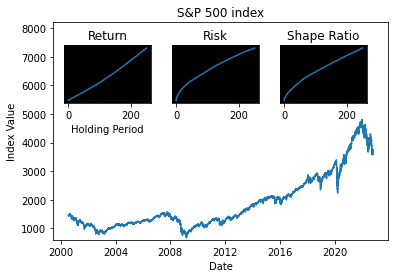